<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/Module2/Aaron_Huizenga_LS_DS_432_Backprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

In [1]:
# Yes my code starts here, it starts by creating a DF

import pandas as pd
import numpy as np

df = pd.DataFrame({
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y':  [0, 1, 1, 1, 1, 0, 0]
})

In [2]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [3]:
# Now I will provide the documentation on indexing
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

x = df.loc[:, 'x1' : 'x3']
x

,x1,x2,x3
0,0,0,1
1,0,1,1
2,1,0,1
3,0,1,0
4,1,0,0
5,1,1,1
6,0,0,0


In [4]:
y = df['y']
y

0    0
1    1
2    1
3    1
4    1
5    0
6    0
Name: y, dtype: int64

In [5]:
# I'd like to have some random numbers come through at ALL times, so I will seed
# numpy random

np.random.seed(747)

In [6]:
x.shape

(7, 3)

In [7]:
# Now I will build the NN class

class NeuralNetwork:
    
    def __init__(self):
      
        # set up the neural network architecture. 
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # initialize weights
        # the resulting weight needs to be 3 rows - input, and 
        # 4 columns - number of nodes. 
        self.weight1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weight2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
        
    # sigmoid function
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    # feed forward network
    def feed_forward(self, X):
        
        # weighted sum
        self.hidden_sum = np.dot(X, self.weight1)
        
        # activate the output from the hidden layer. 
        self.activated_hidden_output = self.sigmoid(self.hidden_sum)
        
        # second weighted sum
        self.output_sum = np.dot(self.activated_hidden_output, self.weight2)
        
        # active the final output from output layer
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [8]:
# This function will define the Neural Network

nn = NeuralNetwork()

In [9]:
output = nn.feed_forward(x)

print('Output \n', output)
print('Actual output \n', y)

Output 
 [[0.52278843]
 [0.48162508]
 [0.4897447 ]
 [0.49311907]
 [0.50622892]
 [0.47708301]
 [0.53597474]]
Actual output 
 0    0
1    1
2    1
3    1
4    1
5    0
6    0
Name: y, dtype: int64


In [10]:
# The following will take 'y' and turn it into a 1 dimensional array

y = [[i] for i in y]

# calc error
error = y - output
error

array([[-0.52278843],
       [ 0.51837492],
       [ 0.5102553 ],
       [ 0.50688093],
       [ 0.49377108],
       [-0.47708301],
       [-0.53597474]])

In [11]:
# What we're going to do next is add back the propagation into the NN to try and 
# help improve the weights. Let's start by building a NN class.

class NeuralNetwork:
    
    def __init__(self):
        # I need to set up the NN infrastructure.
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        

        # I need to initialize the weights.
        self.weight1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weight2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
        
    # sigmoid function
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    # feed forward network
    def feed_forward(self, X):
        
        # Weighted sum
        self.hidden_sum = np.dot(X, self.weight1)
        
        # I need to activate the output from the hidden layer. 
        self.activated_hidden_output = self.sigmoid(self.hidden_sum)
        
        # 2nd weighted sum
        self.output_sum = np.dot(self.activated_hidden_output, self.weight2)
        
        # Finally I need to activate the final output.
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    # Here I need to define the sigmoid derivative
    def sigmoidPrime(self, x):
        # sigmoid of x
        sigmoid_x = self.sigmoid(x)
        # derivative of sigmoid
        der_sigmoid = sigmoid_x * (1-sigmoid_x)
        return der_sigmoid
    
    def propagation(self, X, y, o):
        """Back propagation using gradient descent"""
        
        # y  =  actual values
        # o = predicted values
        
        # This is my output error
        self.output_error = y - o
        

        # Now I will apply the derivative of sigmoid to my error.
        # Then I will multipy the error by the derivative of the second weighted sum
        self.output_delta = self.output_error * self.sigmoidPrime(self.output_sum)
        
        # What is the error in the 2nd weight? 
        # 2nd weight is the weight that fed into the final output.
        self.weight2_error = self.output_delta.dot(self.weight2.T)
        

        # Now I will work on the layer directly about the final output.
        # Now I need to multiply the error in the weights that fed into the hidden layer 
        self.hidden_delta = self.weight2_error * self.sigmoidPrime(self.hidden_sum)
        
        # I need to multiply the input by the new gradient
        self.weight1 += X.T.dot(self.hidden_delta)
        
        # Next I will multiply the activated output of the first hidden layer by the 
        # gradient calculated above. 
        self.weight2 += self.activated_hidden_output.T.dot(self.output_delta)
        
    # Finally I will implement back propagation using a training function
    def train(self, X, y):
        # o = the output of the feed forward function
        o = self.feed_forward(X)
        # implement the backward propagation function during trainig. 
        self.propagation(X, y, o)

In [12]:
nn = NeuralNetwork()

nn.train(x, y)

In [13]:
# What I want to do next is train the NN with multiple epochs

nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(x)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(x)))))
    nn.train(x,y)

+---------EPOCH 1---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.22847567]
 [0.23464008]
 [0.18354763]
 [0.2197748 ]
 [0.16894322]
 [0.17408605]
 [0.18165469]]
Loss: 
 0.3810403608829311
+---------EPOCH 2---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.29984445]
 [0.33199111]
 [0.25843795]
 [0.31440547]
 [0.24066295]
 [0.25795666]
 [0.24276059]]
Loss: 
 0.32259482753243035
+---------EPOCH 3---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.37877077]
 [0.44046153]
 [0.34812055]
 [0.42377169]
 [0.32939275]
 [0.3623740

## Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 

Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

*Note:* The bias term is baked in by default in the Dense layer.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

# Creating Data
data = {
    "x1":[0,0,1,0,1,1,0],
    "x2":[0,1,0,1,0,1,0],
    "x3":[1,1,1,0,0,1,0],
    "y": [0,1,1,1,1,0,0]
}

# Instantiating DataFrame
df = pd.DataFrame.from_dict(data).astype("int")

# X
X = df[["x1", "x2", "x3"]].values

# y
y = df["y"].values

# Instantiating Model
model = Sequential([
    Dense(3, activation="sigmoid", input_dim=3),
    Dense(1, activation="sigmoid")
])

# Compile
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# Fitting and Results
results = model.fit(X, y, epochs=100)

# Scores
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4286
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4286
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4286
Epoch 4/100
1/1 [==============================] - 0s 823us/step - loss: 0.6937 - accuracy: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4286
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4286
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4286
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4286
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4286
Epoch 11/100
1/1 [=========

## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [15]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

In [17]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [19]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [20]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [21]:
# A Binary target to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [22]:
##### Your Code Here #####

# Instantiating Model
model = Sequential([
    Dense(10, activation="sigmoid", input_dim=3),
    Dense(1, activation="sigmoid")
])

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Results
results = model.fit(X,y, epochs=10)

# Score
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 6.8120e-08 - accuracy: 0.4286

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?

## I don't even know if this is a stretch goal or if it was part of the assignment

In [23]:
%%capture
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [24]:
print(tf.__version__)

2.2.0


In [25]:
# getting the dataset
mnist = tf.keras.datasets.mnist

# setting variables to extract datasets from the dataset. 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

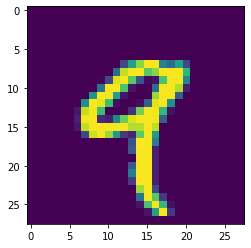

In [26]:
# getting an idea of what images are in our dataset. 
plt.imshow(train_images[4])
plt.show()

In [27]:
# finding out the values making up an image
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [28]:
# standardizing the values to 0's and 1's
train_images = train_images/255
test_images = test_images/255

In [29]:
# designing the model with neural networks
model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                     keras.layers.Dense(128, activation=tf.nn.relu),
                                     keras.layers.Dense(10, activation=tf.nn.softmax)])

In [30]:
# creating a class that will cause our model to stop training when we reach 99% accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nReached 99% accuracy so cancelling training')
      self.model.stop_training = True

In [31]:
# instatiating callback class. 
callback = myCallback()

In [32]:
# compiling the model and fitting the model to training dataset
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10,
          callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1152 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0458 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9890
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9908
Reached 99% accuracy so cancelling training
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9908


In [33]:
# testing to see if our model works and if it can detect an image from a new
# untested dataset
classification = model.predict(test_images)

# testing to see if prediction works. 
print(classification[5])

[1.4623670e-07 9.9613613e-01 2.4499980e-06 9.0430859e-07 4.9379014e-06
 3.5819275e-10 2.3597444e-08 3.8245185e-03 3.0692587e-05 1.6714218e-07]


In [34]:
# I want to verify the classification that returned above

print(test_labels[4])

4


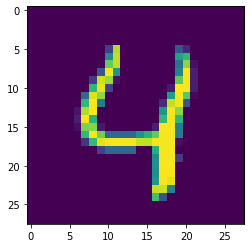

In [35]:
# verifying that test image 4 mathes the label above. 
plt.imshow(test_images[4])
plt.show()